# Heart Disease Classification

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objs as go
import plotly.offline as py

## Data Overview:

In [2]:
# Heart Disease Classificaiton Data Set from UCI Machine Learning Repository
df = pd.read_csv("~/Desktop/Winter_2020/Cogs_118A/FinalProject/Cogs118A_FinalProject/Data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**About this Data Set**:  
  
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). (1)
  
**Target feature**:  

 -  **target**: does the patient have heart disease? (1=yes, 0=no)
   
**Feature Values**:  
 - **age**: age in years  
 - **sex**: sex (1=male; 0=female)  
 - **cp**: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)    
 - **trestbps**: resting blood pressure (in mm Hg on admission to hospital)  
 - **chol**: serum cholesterol in mg/dl  
 - **fbs**: (fasting blood sugar > 120 mg/dl)(1=true; 0=false)  
 - **restecg**: resting electrocardiographic results
 - **thalach**: maximum heart rate achieved  
 - **exang**: exercise induced angina (1=yes; 0=no)  
 - **oldpeak**: ST depression induced by exercise relative to rest  
 - **slope**: the slope of the peak exercise ST segment
 - **ca**: number of major vessels (0-3) colored by fluoroscopy
 - **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect

Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease (1)

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# types of targets for classification
df['target'].unique()

array([1, 0], dtype=int64)

In [6]:
df.shape

(303, 14)

In [7]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [8]:
target_column = ['target']
feature_columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
age = ['age']

### Data Distributions

### Heart Disease (target value)

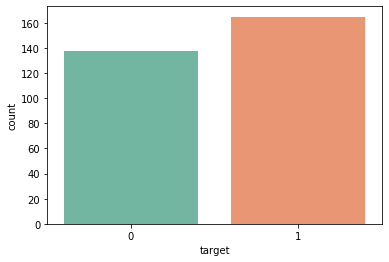

In [9]:
# plot number of patients with heart disease and without
sns.countplot(x="target", data=df, palette="Set2")
plt.show()

In [10]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
HeartDisease = len(df[df.target == 1])
NoHeartDisease = len(df[df.target == 0])
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((HeartDisease / (len(df.target))*100)))
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((NoHeartDisease / (len(df.target))*100)))

Percentage of Patients Have Heart Disease: 54.46%
Percentage of Patients Haven't Heart Disease: 45.54%


 - 54.46% (165) of patients have heart disease
 - 45.54% (138) of patients do not have heart disease

### Sex

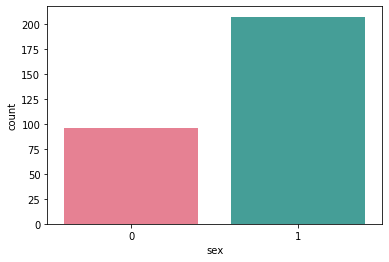

In [12]:
# plot number of male and female patients in data set
sns.countplot(x="sex", data=df, palette="husl")
plt.show()

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
Male = len(df[df.sex == 1])
Female = len(df[df.sex == 0])
print("Percentage of Patients Who are Male: {:.2f}%".format((Male / (len(df.sex))*100)))
print("Percentage of Patients Who are Female: {:.2f}%".format((Female / (len(df.sex))*100)))

Percentage of Patients Who are Male: 68.32%
Percentage of Patients Who are Female: 31.68%


 - 68.32% (207) of patients are male
 - 31.68% (96) of patients are female  
 - Sex is not balanced feature in data set

### Sex to Heart Disease

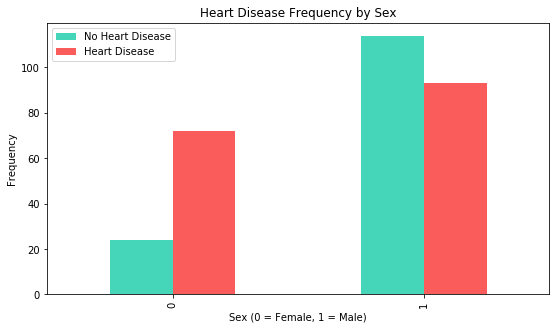

In [15]:
pd.crosstab(df.sex, df.target).plot(kind="bar",figsize=(9,5), color = ['#45d6b9', '#fa5c5c'])
plt.title('Heart Disease Frequency by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.legend(['No Heart Disease','Heart Disease'])
plt.show()

 - Overall, there are more women in the data set with heart disease than women without heart disease  
 - Overall, there are more men in the data set without heart disease than men with heart disease

### Age to Heart Disease

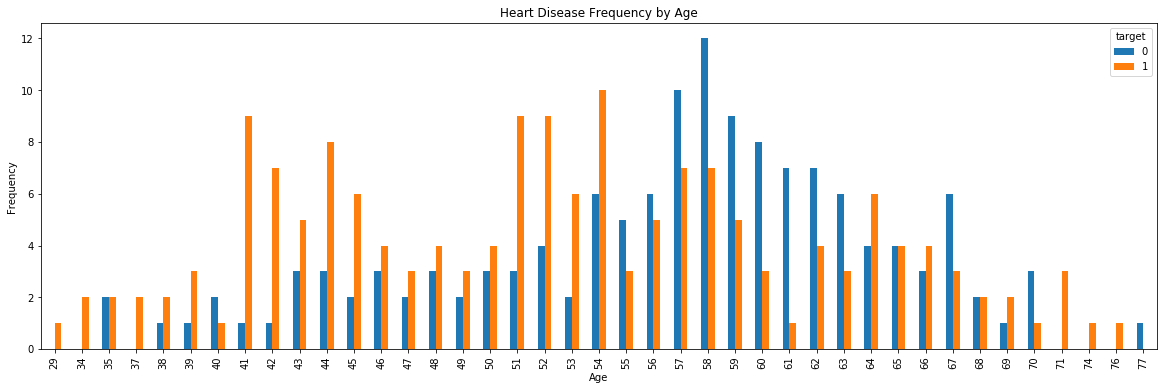

In [16]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

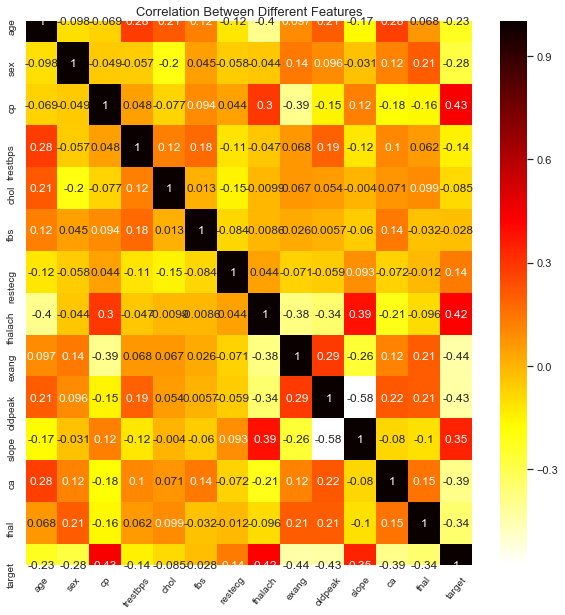

In [17]:
corrplot = df.corr()

plt.figure(figsize=(10,10))

sns.set(font_scale = 1)

heat_map = sns.heatmap(corrplot, cmap = 'hot_r',annot=True, yticklabels=df.columns, xticklabels=df.columns)

plt.xticks(fontsize=10,rotation=50)
plt.yticks(fontsize=10)
plt.title('Correlation Between Different Features', fontsize=13)
plt.show()

### Data Preprocessing (for deeper analysis)

In [18]:
X = df.drop(['target'], axis=1)
y = df['target']

### Random Forest Classifier to find the top features of Data Set

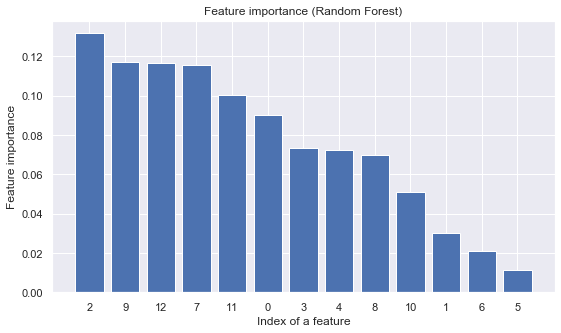

In [19]:
from sklearn.ensemble import RandomForestClassifier

sns.set_style('darkgrid')

forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X, y)

importances = forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(9,5))
plt.bar(range(len(indices)),importances[indices])
plt.xticks(range(len(indices)), indices)
plt.title("Feature importance (Random Forest)")
plt.xlabel('Index of a feature')
plt.ylabel('Feature importance')
plt.show()

### Top 5 features in Data Set:

In [20]:
top_features = X.iloc[:,indices[:5]].columns
print(top_features)

Index(['cp', 'oldpeak', 'thal', 'thalach', 'ca'], dtype='object')


**Top 5 features for predicting target label**:  
1. Chest pain (cp)
2. Maximum heart rate achieved (thalach)
3. ST depression induced by exercise relative to rest (oldpeak) 
4. Number of major vessels (0-3) colored by flourosopy (ca)
5. Thallium Stress Test (thal: 3 = normal; 6 = fixed defect; 7 = reversable defect) 

### Feature: Chest Pain (cp)

According to the Random Forest Classifier, the best feature for predicting whether or not a patient has heart disease is chest pain.  
  
Types of chest pains associated with this data set are:  
 - Value 1: Typical angina (0)
 - Value 2: Atypical angina (1)
 - Value 3: Non-anginal pain (2)
 - Value 4: Asymptomatic (3)

**Typical (classical) angina** chest pain consists of:  
1. Substernal chest pain or discomfort 
2. Provoked by exertion or emotional stress
3. Relieved by rest of nitroglycerine      
   
**Atypical angina** chest pain applies when 2 out of 3 criteria of typical angina are present. (2)  
  
**Non-angina** chest pain is used to describe pain the chest that is not caused by heart disease of heart attack.  (3)  
  
**Asymptomatic** chest pain does not exclude a patient from ischemic heart disease. Asymptomatic ischemia can be induced by physical or mental stress but may occur without any obvious trigger. (4)  
  
Sources:  
https://www.timeofcare.com/typical-vs-atypical-chest-pain/ (2)  
https://my.clevelandclinic.org/health/diseases/15851-gerd-non-cardiac-chest-pain (3)  
https://www.ahajournals.org/doi/full/10.1161/01.cir.0000033486.25339.ef (4)


In [21]:
# creating a new data frame for feature chest pain and target with a 'count' column
df_cp = df.groupby(["target","cp"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_cp = df_cp.sort_values("count", ascending = False).reset_index()

df_cp

,index,target,cp,count
0,0,0,0,104
1,6,1,2,69
2,5,1,1,41
3,4,1,0,39
4,2,0,2,18
5,7,1,3,16
6,1,0,1,9
7,3,0,3,7


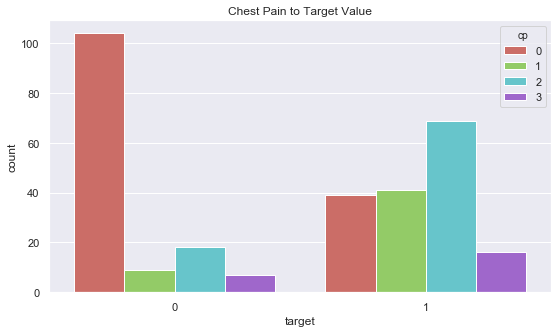

In [22]:
# bar plot for comparison with cp and target
plt.figure(figsize = (9,5))
sns.barplot(x = "target",y="count", 
            hue = "cp",
            data = df_cp,
            palette = 'hls')
sns.set(style='darkgrid')
plt.title("Chest Pain to Target Value")
plt.show()

 - Most patients in the data set without heart disease report typical angina (0) chest pain
 - The most common type of chest pain among patients with heart disease is non-angina (2) chest pain

### Feature: Maximum Heart Rate Achieved (thalach)

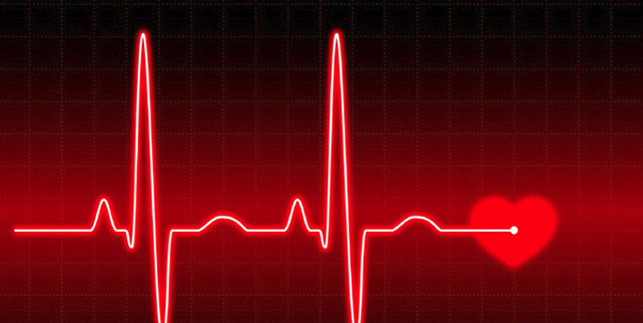

Image Source: https://hometale.org/wp-content/uploads/2018/11/best-heart-rate-monitor-reviews.jpg

In [23]:
print('The minimum and maximum heart rates in the data set are:')
print('Min Heart Rate:', df['thalach'].min(),',','Max Heart Rate:', df['thalach'].max())

The minimum and maximum heart rates in the data set are:
Min Heart Rate: 71 , Max Heart Rate: 202


A high resting heart rate consistently above 80 beats per minute may be an indication of heart disease. The rate at which your heart is beating when it is working its hardest to meet the oxygen needs of your body is your maximum heart rate.(5)  
  
Soruce: https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you (5)

#### Heart Disease in Relation to Heart Rate and Age

In [24]:
#import patsy
#import statsmodels.api as sm
#outcome, predictors = patsy.dmatrices('thalach ~ age', df)

#mod = sm.OLS(outcome, predictors)

## fit the model
#res = mod.fit()

## look at the results
#print(res.summary())

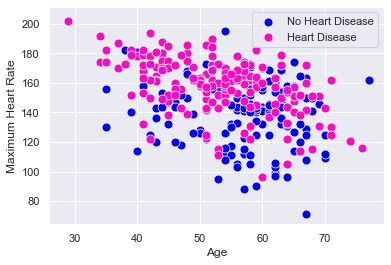

In [25]:
sns.scatterplot(x=df.age[df.target==0], y=df.thalach[(df.target==0)], alpha = 1, s =80,color = 'blue')
sns.scatterplot(x=df.age[df.target==1], y=df.thalach[(df.target==1)],alpha = 1, s=80,color = '#ff0ac2')

# this plots a prediction line for heart rate from age from OLS stats in above cell
#xs = np.arange(df['age'].min(), df['age'].max())
#ys = -1.0051 * xs + 204.2892
#plt.plot(xs, ys, '#1900ff', linewidth=4)

plt.legend(['No Heart Disease','Heart Disease'])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

- Maximum heart rate tends to decrease with age
- Heart rate tends to increase in the presence of heart disease

### Feature: ST depression induced by exercise relative to rest (oldpeak)

ST depression refers to a fining on an electrocardiogram, where the trace in the ST segment is abnormally low below the baseline. Exercise induced ST segment depression is condisdered a reliable ECG finding for the diagnosis of obtrusive coronoary atherosclerosis and associated with coronoary artery disease.(6)  
  
Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1768611/ (6)

In [26]:
# creating a new data frame for feature chest pain and target with a 'count' column
df_op = df.groupby(["target","oldpeak"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_op = df_op.sort_values("oldpeak", ascending = False).reset_index()

df_op

,index,target,oldpeak,count
0,34,0,6.2,1
1,33,0,5.6,1
2,32,0,4.4,1
3,60,1,4.2,1
4,31,0,4.2,1
...,...,...,...,...
56,2,0,0.2,3
57,36,1,0.1,4
58,1,0,0.1,3
59,35,1,0.0,74


#### ST Depression Distribution and Heart Disease

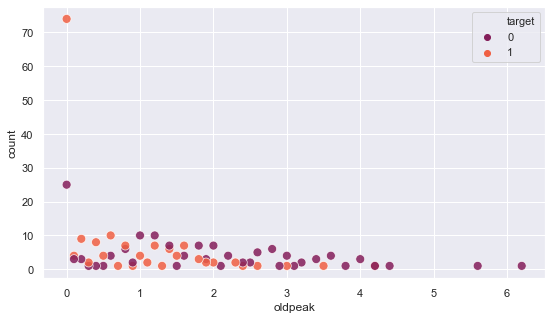

In [27]:
plt.figure(figsize = (9,5))
sns.scatterplot(x='oldpeak', y='count', hue = 'target', 
                data = df_op, alpha=0.85, s= 80, 
                palette = 'rocket')
plt.xlabel("oldpeak")
plt.ylabel("count")
plt.show()

- ST Depression value of 0 has more patients with heart disease than patients without heart disease

### Feature: Major Vessels (0-3) Colored by Fluoroscopy (ca)

Fluoroscopy is an imaging technique that uses X-rays to obtain moving images in real-time of the interior of an object, think X-ray movie. It can be used to evaluate specific areas of the body, such as heart vessels.  
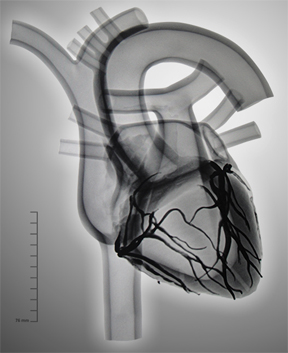 
Source: https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=92&contentid=P07662 (7)  
Image Source: https://www.thecgroup.com/wp-content/uploads/2015/11/1396-C-84-Fluoroscopic-Heart.jpg 

In [28]:
# creating a new data frame for feature vessels and target with a 'count' column
df_ca = df.groupby(["target","ca"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_ca = df_ca.sort_values("count", ascending = False).reset_index()

df_ca

,index,target,ca,count
0,5,1,0,130
1,0,0,0,45
2,1,0,1,44
3,2,0,2,31
4,6,1,1,21
5,3,0,3,17
6,7,1,2,7
7,9,1,4,4
8,8,1,3,3
9,4,0,4,1


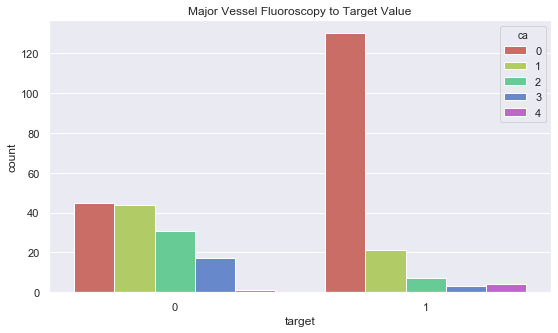

In [29]:
# bar plot for comparison with vessels and target
plt.figure(figsize = (9,5))
sns.barplot(x = "target",y="count", 
            hue = "ca",
            data = df_ca,
            palette = 'hls')
sns.set(style='darkgrid')
plt.title("Major Vessel Fluoroscopy to Target Value")
plt.show()

 - Major vessel 0 is most associated with heart disease

### Feature: Thallium Stress Test (thal)

A thallium stress test is a nuclear imaging test that shows how well blood flows into your heart during exercise or at rest. The test is also referred to as cardiac or nuclear stress test. The procedure involves the administration of a liquid with small amounts of a radioactive isotope called radioisotope into one of the veins. The radioisotope flows through the bloodstream and enters in the heart. Once in the heart, a special gamma camera can detect the radiation and reveal any issues the heart muscle may be experiencing.  
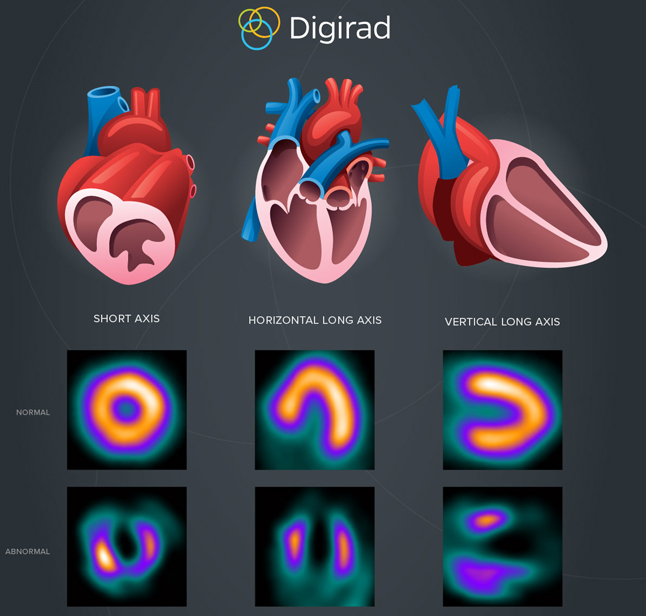
Source: https://www.healthline.com/health/thallium-stress-test  
Image Source: https://www.digirad.com/wp-content/uploads/2018/06/understanding-nuclear-medicine-stress-test.jpg!

 (thal: 3 = normal; 6 = fixed defect; 7 = reversable defect) 

The data source provided thal values mapping to: 3 = normal; 6 = fixed defect; 7 = reversable defect; however this was actually not the case. Actual values for thallium stress test (thal) in the data set are:  
 - 0: null 
 - 1: fixed defect
 - 2: normal
 - 3: reversable defect

In [30]:
# creating a new data frame for feature thal and target with a 'count' column
df_thal = df.groupby(["target","thal"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_thal = df_thal.sort_values("count", ascending = False).reset_index()

df_thal

,index,target,thal,count
0,6,1,2,130
1,3,0,3,89
2,2,0,2,36
3,7,1,3,28
4,1,0,1,12
5,5,1,1,6
6,0,0,0,1
7,4,1,0,1


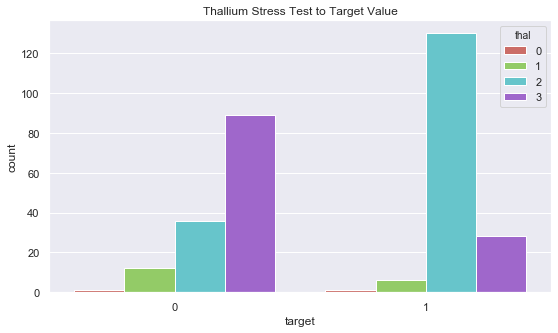

In [31]:
# bar plot for comparison with cp and target
plt.figure(figsize = (9,5))
sns.barplot(x = "target",y="count", 
            hue = "thal",
            data = df_thal,
            palette = 'hls')
sns.set(style='darkgrid')
plt.title("Thallium Stress Test to Target Value")
plt.show()

 - Normal thallium stress test results are most associated with heart disease
 - Reversable defect thallium stress test results are most associated with no heart disease

## Model Implementation

In [32]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import cross_val_score

In [33]:
# Dictionary to store results of models
result_dict_train = {}
result_dict_test = {}

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 21)

standardscale = StandardScaler()
X_train = standardscale.fit_transform(X_train)
X_test = standardscale.transform(X_test)

### Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.81      0.78      0.79        37

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



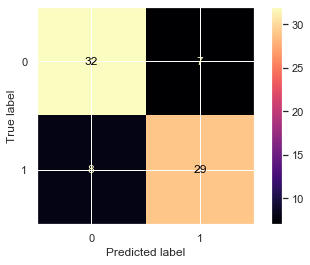

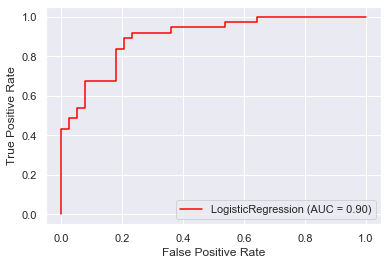

In [35]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(random_state = None).fit(X_train, y_train)
accuracies = cross_val_score(logistic_clf, X_train, y_train, cv=5)

print(classification_report(y_true=y_test, y_pred=logistic_clf.predict(X_test)))
plot_confusion_matrix(logistic_clf, X_test, y_test, cmap='magma')
plot_roc_curve(logistic_clf, X_test, y_test, c='red');

In [36]:
# Storing results in result dictionary
result_dict_train["Logistic Regression Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Regression Test Score"] = logistic_clf.score(X_test, y_test)

### KNN

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        39
           1       0.81      0.70      0.75        37

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



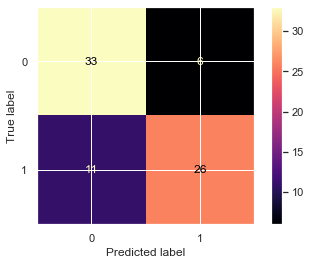

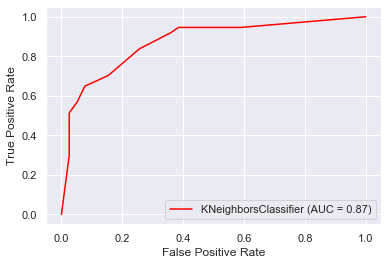

In [37]:
from sklearn.neighbors import KNeighborsClassifier

min_neighbors = 1
max_neighbors = 30 

knn_clf = clf = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
accuracies = cross_val_score(knn_clf, X_train, y_train, cv=5)


print(classification_report(y_true=y_test, y_pred=knn_clf.predict(X_test)))
plot_confusion_matrix(knn_clf, X_test, y_test, cmap = 'magma')
plot_roc_curve(knn_clf, X_test, y_test, c='red');

In [38]:
# Storing results in result dictionary
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn_clf.score(X_test, y_test)

### Random Forest

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        39
           1       0.77      0.73      0.75        37

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



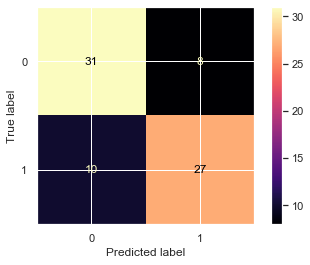

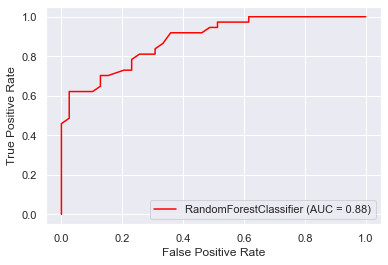

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 42).fit(X_train, y_train)
accuracies = cross_val_score(rf_clf, X_train, y_train, cv=5)

print(classification_report(y_true=y_test, y_pred=rf_clf.predict(X_test)))
plot_confusion_matrix(rf_clf, X_test, y_test, cmap= 'magma')
plot_roc_curve(rf_clf, X_test, y_test, c='red');

In [40]:
# Storing results in result dictionary
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rf_clf.score(X_test, y_test)

### Decision Tree

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        39
           1       0.74      0.78      0.76        37

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



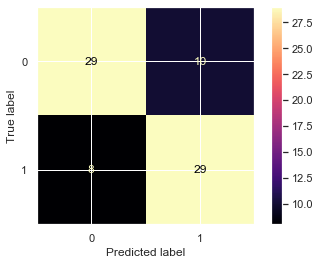

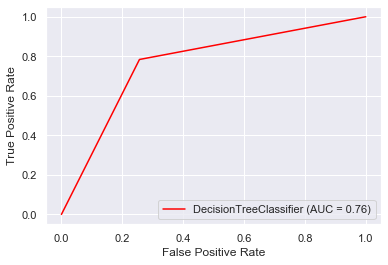

In [41]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
accuracies = cross_val_score(tree_clf, X_train, y_train, cv=5)

print(classification_report(y_true=y_test, y_pred=tree_clf.predict(X_test)))
plot_confusion_matrix(tree_clf, X_test, y_test, cmap = 'magma')
plot_roc_curve(tree_clf, X_test, y_test, c ='red');

In [42]:
# Storing results in result dictionary
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = tree_clf.score(X_test, y_test)

### SVM 

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        39
           1       0.74      0.78      0.76        37

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



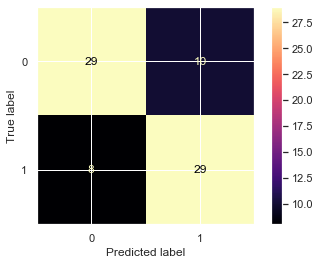

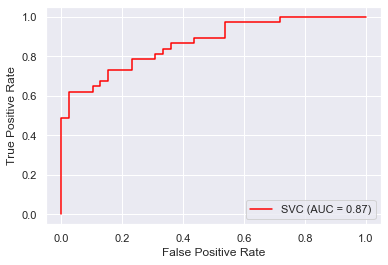

In [43]:
from sklearn.svm import SVC

svm_clf = SVC().fit(X_train, y_train)
accuracies = cross_val_score(svm_clf, X_train, y_train, cv=5)

print(classification_report(y_true=y_test, y_pred=svm_clf.predict(X_test)))
plot_confusion_matrix(svm_clf, X_test, y_test, cmap = 'magma')
plot_roc_curve(svm_clf, X_test, y_test, c ='red');

In [44]:
# Storing results in result dictionary
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = tree_clf.score(X_test, y_test)

## Results

In [45]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

,Score
Logistic Regression Train Score,0.819517
KNN Train Score,0.824058
Random Forest Train Score,0.832850
Decision Tree Train Score,0.736232
SVM Train Score,0.823961


In [46]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
Logistic Regression Test Score,0.802632
KNN Test Score,0.776316
Random Forest Test Score,0.763158
Decision Tree Test Score,0.763158
SVM Test Score,0.763158


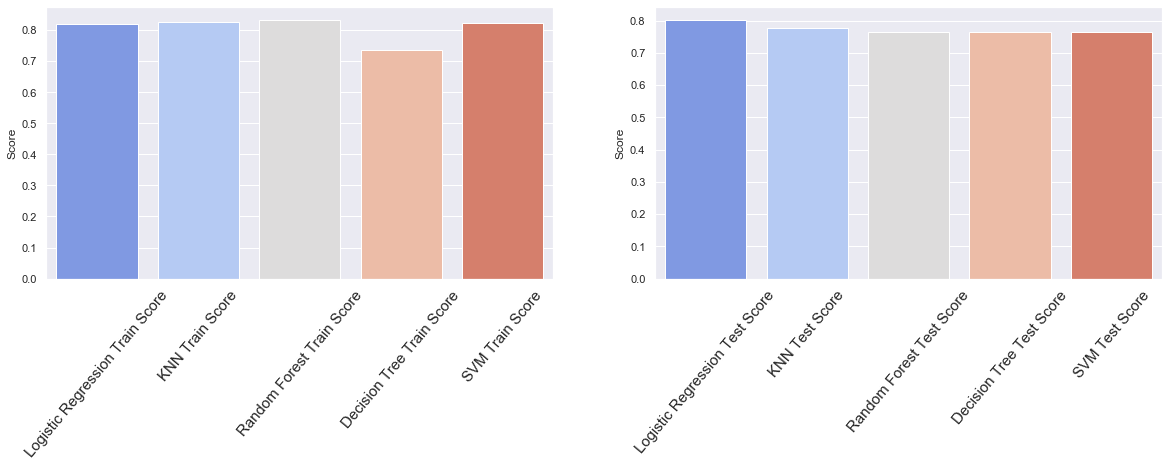

In [47]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0], palette = 'coolwarm')
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1], palette = 'coolwarm')
ax[0].set_xticklabels(df_result_train.index,rotation = 50, fontsize = 15)
ax[1].set_xticklabels(df_result_test.index,rotation = 50, fontsize = 15)
plt.show()